In [22]:
import pandas as pd
import sklearn
%matplotlib inline

df = pd.read_table('https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/sms.tsv',
sep='\t', header=None, names=['label', 'msg'])
df

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


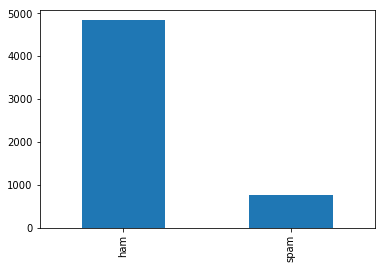

In [23]:
df.label.value_counts().plot(kind="bar")

In [24]:
df.label.value_counts() / df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [25]:
df.msg = df.msg.apply(lambda x:x.lower())
# make all strings lower case so we can search easier

df[df.msg.str.contains('send cash now')] .shape

(0, 2)

In [28]:
spams = df[df.label == 'spam']
for word in ['send', 'cash', 'now']:
    print word, spams[spams.msg.str.contains(word)].shape[0] / float(spams.shape[0])

 send 0.0963855421687
cash 0.091030789826
now 0.279785809906


In [29]:
# simple count vectorizer example
from sklearn.feature_extraction.text import CountVectorizer
# start with a simple example
train_simple = ['call you tonight','Call me a cab','please call me... PLEASE 44!']

# learn the 'vocabulary' of the training data
vect = CountVectorizer()
train_simple_dtm = vect.fit_transform(train_simple)
pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [31]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing)
test_simple = ["please don't call me"]
test_simple_dtm = vect.transform(test_simple)
test_simple_dtm.toarray()
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


In [34]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label, random_state=1)

# instantiate the vectorizer
vect = CountVectorizer()

# learn vocabulary and create document-term matrix in a single step
train_dtm = vect.fit_transform(X_train)
train_dtm

<4179x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [35]:
# transform testing data into a document-term matrix
test_dtm = vect.transform(X_test)
test_dtm

<1393x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [36]:
## MODEL BUILDING WITH NAIVE BAYES
# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
# import our model

nb = MultinomialNB()
# instantiate our model

nb.fit(train_dtm, y_train)
# fit it to our training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
# make predictions on test data using test_dtm
preds = nb.predict(test_dtm)

preds

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], 
      dtype='|S4')

In [38]:
# compare predictions to true labels
from sklearn import metrics
print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

0.988513998564
[[1203    5]
 [  11  174]]


In [41]:
nb.classes_

array(['ham', 'spam'], 
      dtype='|S4')